Dataset Head:
        date    device  failure    metric1  metric2  metric3  metric4  \
0 2015-01-01  S1F01085        0  215630672       55        0       52   
1 2015-01-01  S1F0166B        0   61370680        0        3        0   
2 2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3 2015-01-01  S1F01JE0        0   79694024        0        0        0   
4 2015-01-01  S1F01R2B        0  135970480        0        0        0   

   metric5  metric6  metric7  metric8  metric9  
0        6   407438        0        0        7  
1        6   403174        0        0        0  
2       12   237394        0        0        0  
3        6   410186        0        0        0  
4       15   313173        0        0        3  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     124494 non-null  date

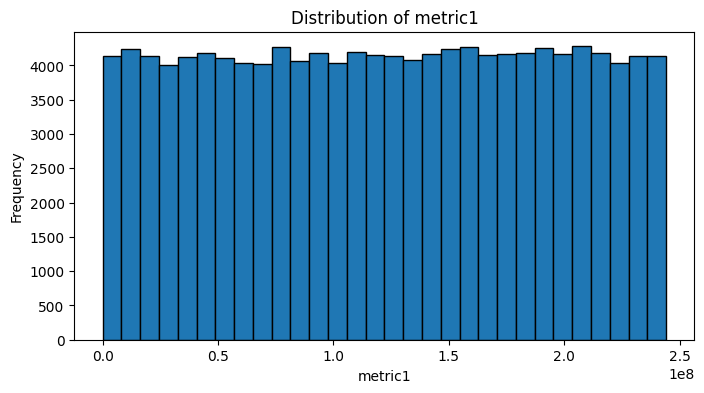

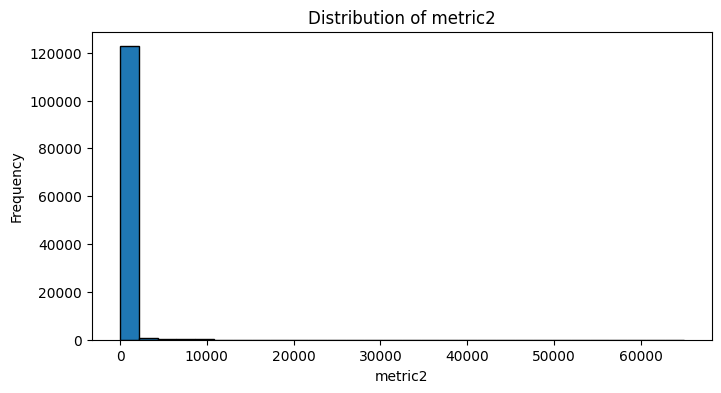

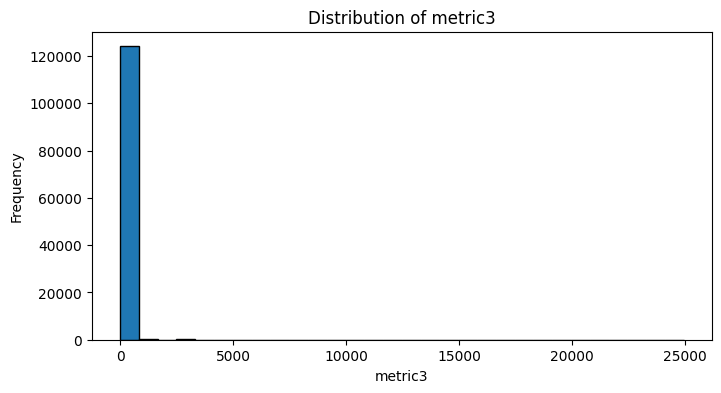

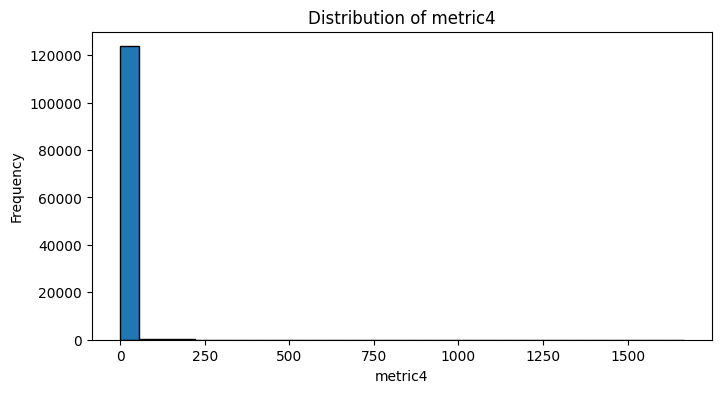

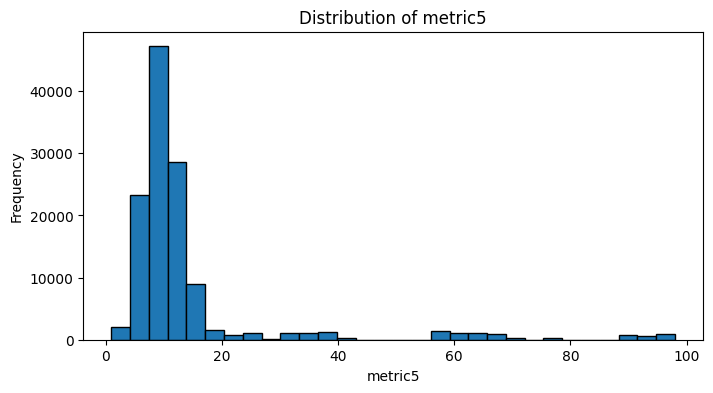

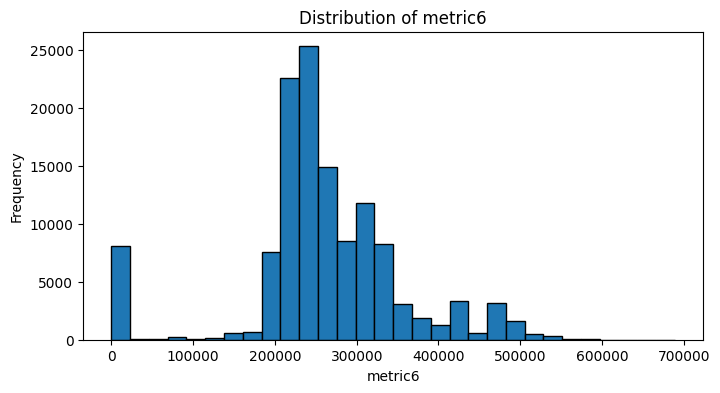

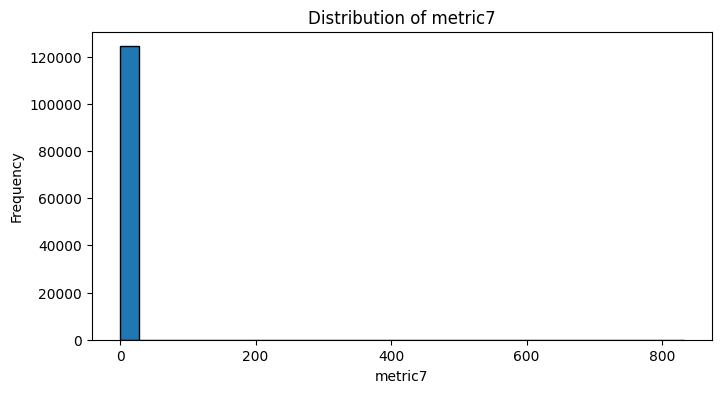

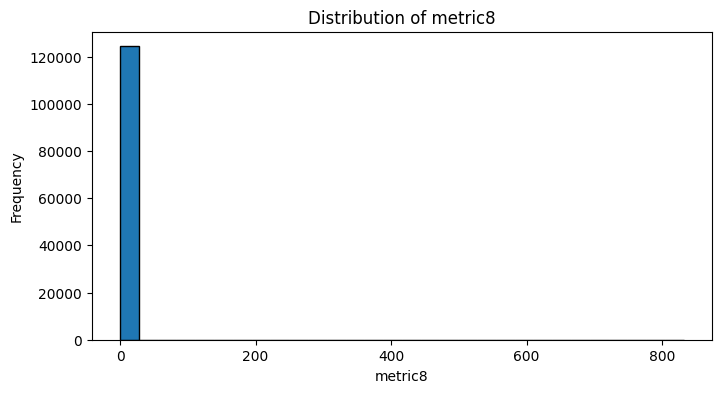

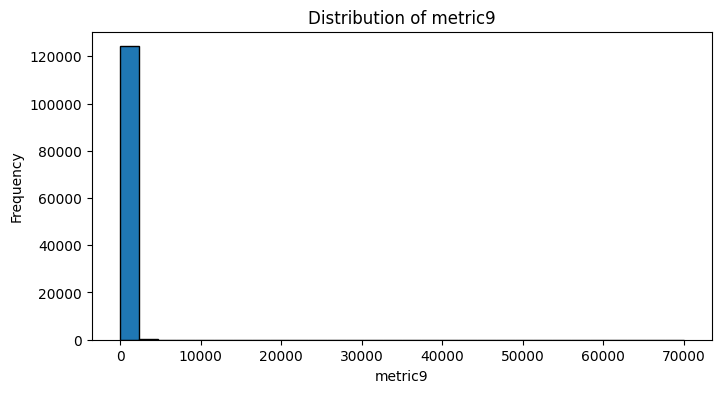

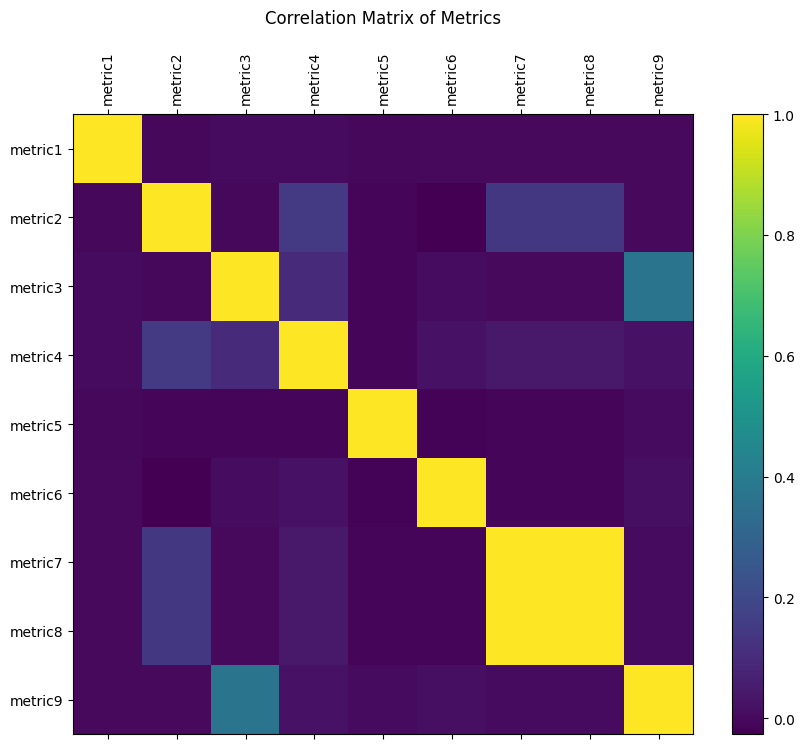

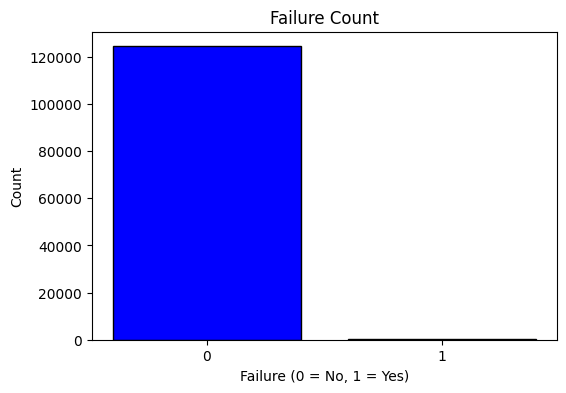

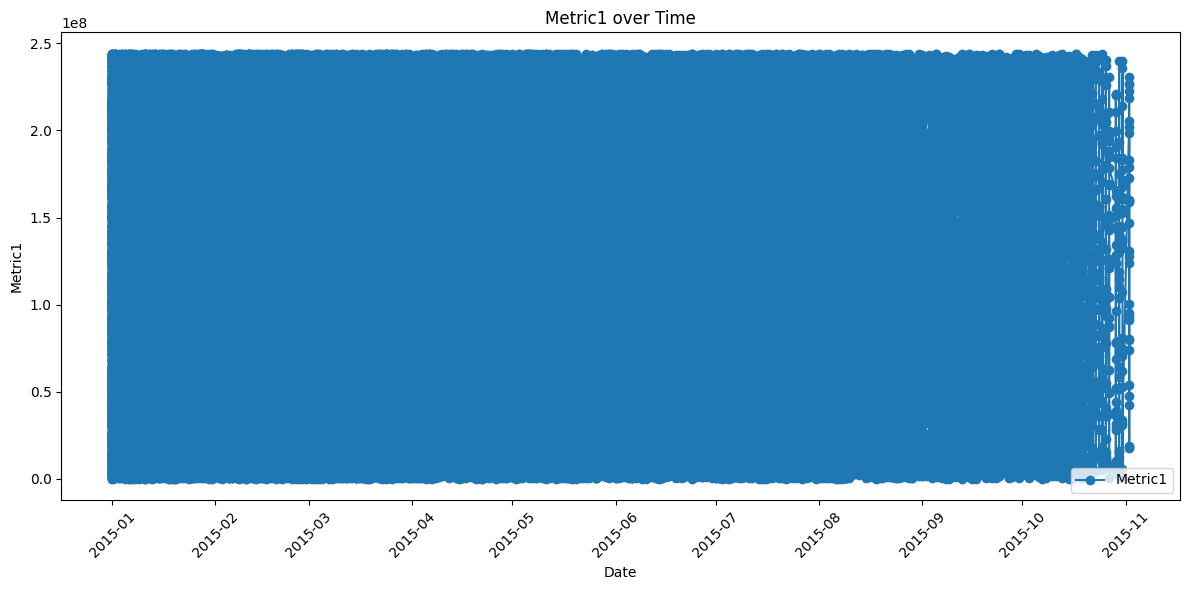

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('predictive_maintenance_dataset.csv')

# Convert the 'date' column to datetime objects
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Display dataset info
print("\nDataset Info:")
print(data.info())

# Summary statistics of the dataset (numeric columns)
print("\nDataset Description:")
print(data.describe())

# Check for missing values in each column
print("\nMissing Values:")
print(data.isnull().sum())

metric_cols = [col for col in data.columns if col.startswith('metric')]

# Plot histograms for each metric column
for col in metric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(data[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Compute the correlation matrix for the metric columns
corr_matrix = data[metric_cols].corr()

# Plot the correlation matrix using matplotlib's matshow
plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, cmap='viridis', fignum=1)
plt.colorbar()
plt.title('Correlation Matrix of Metrics', pad=20)
plt.xticks(range(len(metric_cols)), metric_cols, rotation=90)
plt.yticks(range(len(metric_cols)), metric_cols)
plt.show()

# Plot failure counts (assuming 'failure' is a binary column, e.g., 0 = no failure, 1 = failure)
failure_counts = data['failure'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(failure_counts.index.astype(str), failure_counts.values, color='blue', edgecolor='black')
plt.title('Failure Count')
plt.xlabel('Failure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Example time series plot: Metric1 over time
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['metric1'], marker='o', linestyle='-', label='Metric1')
plt.title('Metric1 over Time')
plt.xlabel('Date')
plt.ylabel('Metric1')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
